In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scraper import scrape_reviews

In [15]:
def create_histplot(df):
    df_sorted = df.sort_values(by='ratings').reset_index(drop=True)
    plt.figure(figsize=(10,6))
    sns.histplot(x=df_sorted['ratings'], kde=True)
    plt.title('Verteilung der Bewertungen')
    plt.xlabel('Sternebewertung')
    plt.ylabel('Anzahl')
    plt.grid(True)

    fig = plt.gcf()
    plt.close()
    return fig

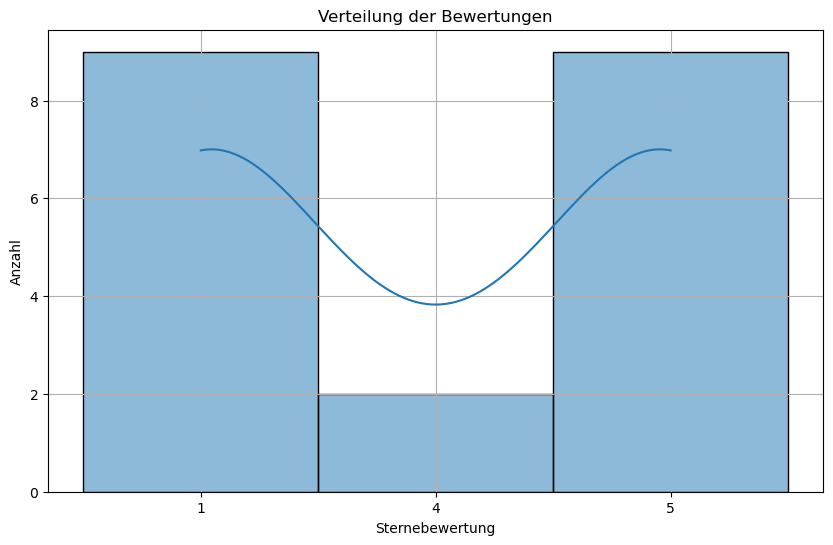

In [17]:
df = scrape_reviews('studydrive.net', 1, False)
create_histplot(df)

In [52]:
def create_lineplot(df):
    df['date'] = pd.to_datetime(df['date'])
    
    df_grouped = df.groupby(['date', 'ratings']).size().reset_index(name='count')
    
    df_sorted = df_grouped.sort_values(by='date', ascending=True).reset_index(drop=True)
    
    plt.figure(figsize=(10,6))
    sns.lineplot(x='date', y='count', data=df_sorted)
    plt.title('Bewertungen über die Zeit')
    plt.xlabel('Datum')
    plt.ylabel('Anzahl der Bewertungen')
    plt.grid(True)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))


    plt.xticks(rotation=45)
    
    fig = plt.gcf()
    plt.close()
    return fig

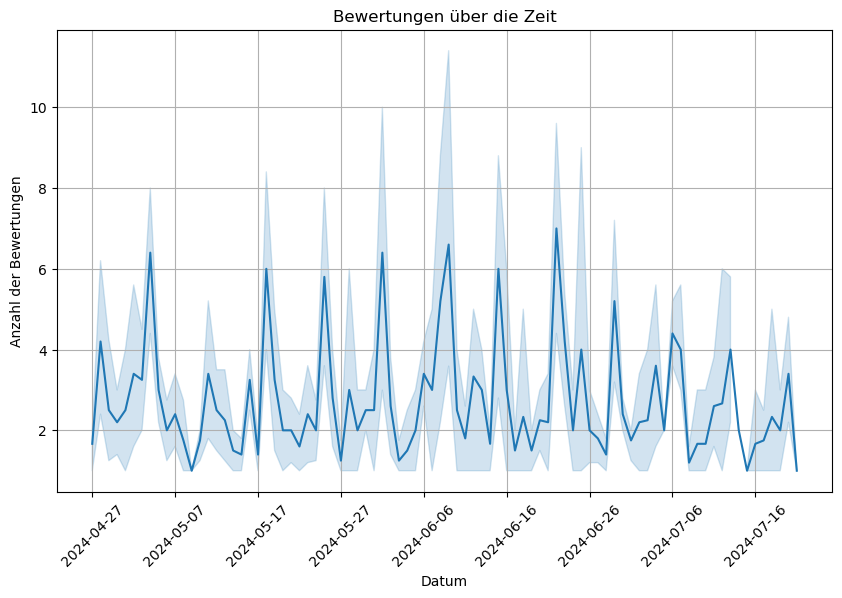

In [57]:
df = scrape_reviews('hellofresh.de', 5, False)
create_lineplot(df)